In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_survey_data.csv')


Column names:
['response_id', 'Career', 'Citizenship', 'Nationality', 'Year_since_Matriculation', 'Year_of_Study', 'Primary_Programme', 'Gender', 'Department', 'Housing_Type', 'Q1_How_many_events_have_you_Volunteered_in', 'Q5_What_are_your_levels_of_stress', 'Q6_How_Satisfied_You_are_with_your_Student_Life', 'Q2_How_many_events_have_you_Participated_in', 'Q3_How_many_activities_are_you_Interested_in', 'Q4_How_many_activities_are_you_Passionate_about', 'Q7_How_much_effort_do_you_make_to_interact_with_others', 'Q8_About_How_events_are_you_aware_about', 'Q9_What_is_an_ideal_student_life', 'Q1_Volunteered_For_Animal_welfare', 'Q1_Volunteered_For_Arts_Culture_Heritage', 'Q1_Volunteered_For_Children_Youth', 'Q1_Volunteered_For_Community_building', 'Q1_Volunteered_For_Diversity_Inclusion', 'Q1_Volunteered_For_Environmental_sustainability', 'Q1_Volunteered_For_Families', 'Q1_Volunteered_For_Health_Well_being', 'Q1_Volunteered_For_Seniors', 'Q1_Volunteered_For_Poverty_reduction', 'Q1_Volunteer

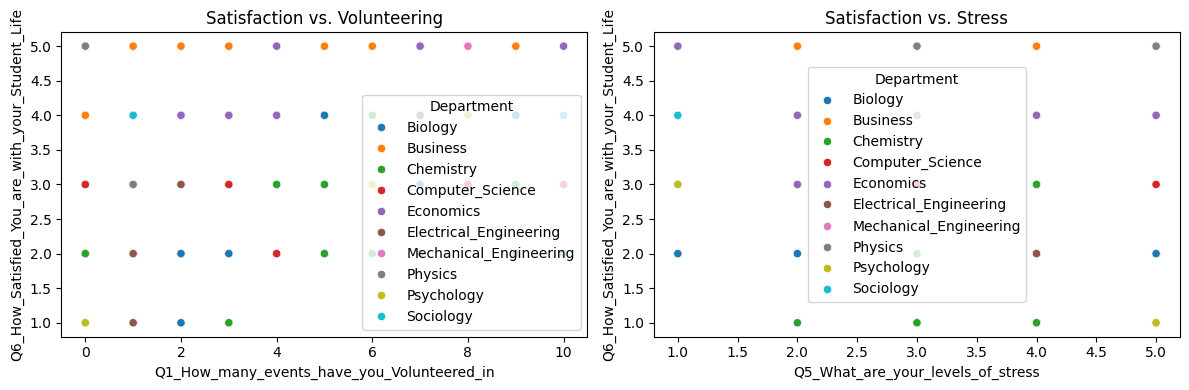

                            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q6_How_Satisfied_You_are_with_your_Student_Life
No. Observations: 1565    Method:             REML                                           
No. Groups:       10      Scale:              0.2893                                         
Min. group size:  135     Log-Likelihood:     -1283.9013                                     
Max. group size:  170     Converged:          Yes                                            
Mean group size:  156.5                                                                      
----------------------------------------------------------------------------------------------------
                      Coef.         Std.Err.           z           P>|z|        [0.025        0.975]
----------------------------------------------------------------------------------------------------
Intercept              3.888           0.175         22.252        

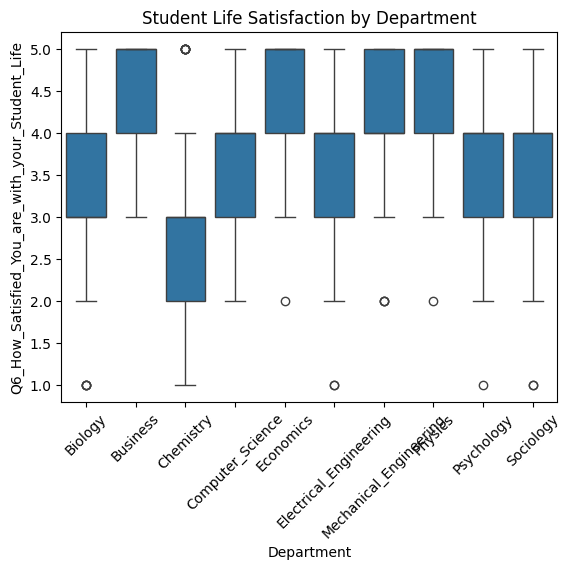

In [3]:
# Verify column names
print("\nColumn names:")
print(df.columns.tolist())

# Check dataset size
print(f"\nNumber of rows: {len(df)}")
print(f"Number of departments: {df['Department'].nunique()}")
print(f"Average group size: {len(df) / df['Department'].nunique():.1f}")

# Ensure categorical variables are properly encoded
df['Gender'] = df['Gender'].astype('category')
df['Department'] = df['Department'].astype('category')

# Scale numeric predictors
df['Q1_scaled'] = (df['Q1_How_many_events_have_you_Volunteered_in'] - df['Q1_How_many_events_have_you_Volunteered_in'].mean()) / df['Q1_How_many_events_have_you_Volunteered_in'].std()
df['Q5_scaled'] = (df['Q5_What_are_your_levels_of_stress'] - df['Q5_What_are_your_levels_of_stress'].mean()) / df['Q5_What_are_your_levels_of_stress'].std()

# Diagnostic plot: Check relationships
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Q1_How_many_events_have_you_Volunteered_in', y='Q6_How_Satisfied_You_are_with_your_Student_Life', hue='Department', data=df)
plt.title('Satisfaction vs. Volunteering')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Q5_What_are_your_levels_of_stress', y='Q6_How_Satisfied_You_are_with_your_Student_Life', hue='Department', data=df)
plt.title('Satisfaction vs. Stress')
plt.tight_layout()
plt.show()

# Define and fit the HLM model with robust optimization
model = smf.mixedlm("Q6_How_Satisfied_You_are_with_your_Student_Life ~ Q1_scaled + Q5_scaled + Gender", df, groups=df["Department"])
try:
    result = model.fit(method='lbfgs', maxiter=1000)
    print(result.summary())
except Exception as e:
    print(f"Model fitting failed: {e}")
    print("Trying simplified model...")
    model = smf.mixedlm("Q6_How_Satisfied_You_are_with_your_Student_Life ~ Q1_scaled + Q5_scaled", df, groups=df["Department"])
    result = model.fit(method='lbfgs', maxiter=1000)
    print(result.summary())

# Visualization: Boxplot of satisfaction by department
sns.boxplot(x='Department', y='Q6_How_Satisfied_You_are_with_your_Student_Life', data=df)
plt.xticks(rotation=45)
plt.title('Student Life Satisfaction by Department')
plt.show()

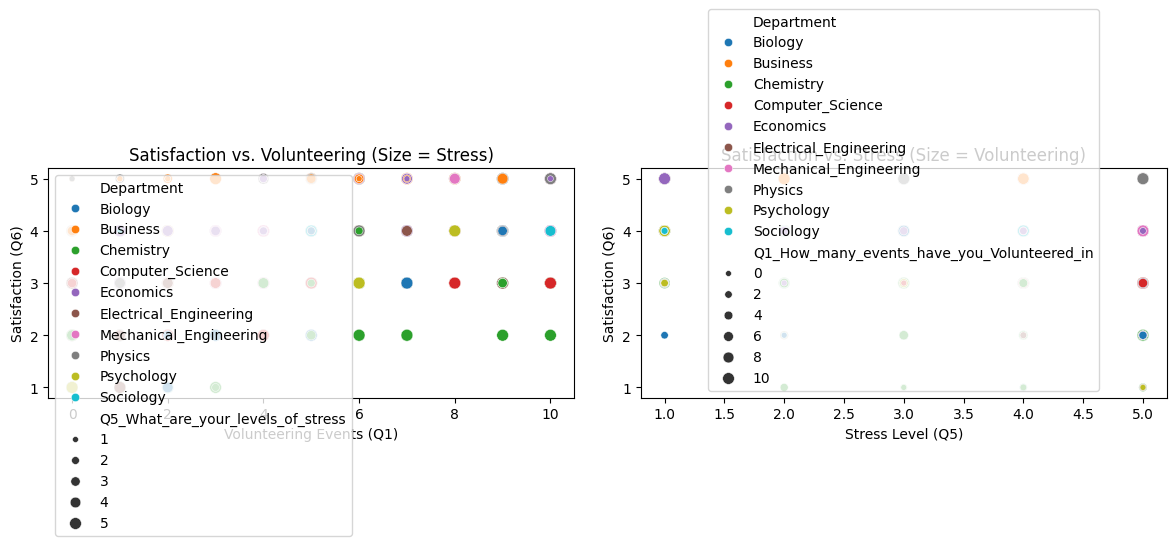

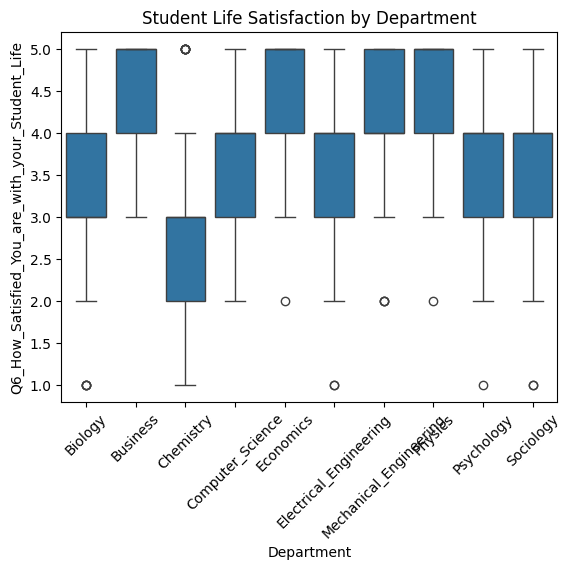

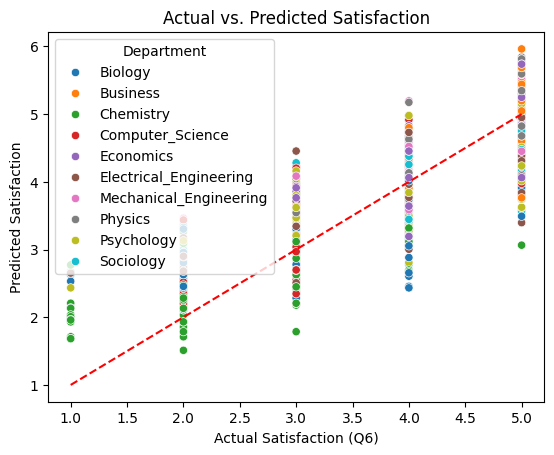

                            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q6_How_Satisfied_You_are_with_your_Student_Life
No. Observations: 1565    Method:             REML                                           
No. Groups:       10      Scale:              0.2893                                         
Min. group size:  135     Log-Likelihood:     -1283.9013                                     
Max. group size:  170     Converged:          Yes                                            
Mean group size:  156.5                                                                      
----------------------------------------------------------------------------------------------------
                      Coef.         Std.Err.           z           P>|z|        [0.025        0.975]
----------------------------------------------------------------------------------------------------
Intercept              3.888           0.175         22.252        

In [5]:
# Plot 1: Scatterplot of Satisfaction vs. Volunteering
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Q1_How_many_events_have_you_Volunteered_in',
                y='Q6_How_Satisfied_You_are_with_your_Student_Life',
                hue='Department', size='Q5_What_are_your_levels_of_stress', data=df)
plt.title('Satisfaction vs. Volunteering (Size = Stress)')
plt.xlabel('Volunteering Events (Q1)')
plt.ylabel('Satisfaction (Q6)')

# Plot 2: Scatterplot of Satisfaction vs. Stress
plt.subplot(1, 2, 2)
sns.scatterplot(x='Q5_What_are_your_levels_of_stress',
                y='Q6_How_Satisfied_You_are_with_your_Student_Life',
                hue='Department', size='Q1_How_many_events_have_you_Volunteered_in', data=df)
plt.title('Satisfaction vs. Stress (Size = Volunteering)')
plt.xlabel('Stress Level (Q5)')
plt.ylabel('Satisfaction (Q6)')
plt.tight_layout()
plt.show()

# Plot 3: Boxplot of Satisfaction by Department
sns.boxplot(x='Department', y='Q6_How_Satisfied_You_are_with_your_Student_Life', data=df)
plt.xticks(rotation=45)
plt.title('Student Life Satisfaction by Department')
plt.show()

# Plot 4: Predicted vs. Actual Satisfaction
model = smf.mixedlm("Q6_How_Satisfied_You_are_with_your_Student_Life ~ Q1_scaled + Q5_scaled + Gender",
                    df, groups=df["Department"])
result = model.fit(method='lbfgs', maxiter=1000)
df['Predicted_Satisfaction'] = result.fittedvalues
sns.scatterplot(x='Q6_How_Satisfied_You_are_with_your_Student_Life', y='Predicted_Satisfaction',
                hue='Department', data=df)
plt.plot([1, 5], [1, 5], 'r--')  # Diagonal line for reference
plt.title('Actual vs. Predicted Satisfaction')
plt.xlabel('Actual Satisfaction (Q6)')
plt.ylabel('Predicted Satisfaction')
plt.show()

# Print model summary for reference
print(result.summary())

In [7]:
model = smf.mixedlm("Q6_How_Satisfied_You_are_with_your_Student_Life ~ Q1_scaled + Q5_scaled + Gender + Year_of_Study + Q1_Volunteered_For_Animal_welfare",
                    df, groups=df["Department"])
result = model.fit(method='lbfgs', maxiter=1000)
print(result.summary())

                            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q6_How_Satisfied_You_are_with_your_Student_Life
No. Observations: 1565    Method:             REML                                           
No. Groups:       10      Scale:              0.2897                                         
Min. group size:  135     Log-Likelihood:     -1289.9056                                     
Max. group size:  170     Converged:          Yes                                            
Mean group size:  156.5                                                                      
------------------------------------------------------------------------------------------------
                                      Coef.     Std.Err.       z       P>|z|    [0.025    0.975]
------------------------------------------------------------------------------------------------
Intercept                              3.890       0.178     21.875    0.000   

In [8]:
# Define the new model formula
model_formula = """
Q6_How_Satisfied_You_are_with_your_Student_Life ~
Q1_scaled + Q5_scaled +
Q1_scaled * Q5_scaled +
Q2_Participated_in_Clubs +
Q3_Interested_in_Entrepreneurship +
Q4_Passionate_about_Environmental_sustainability +
Q7_How_much_effort_do_you_make_to_interact_with_others +
Q8_About_How_events_are_you_aware_about
"""

# Fit the model
model = smf.mixedlm(model_formula, df, groups=df["Department"])
result = model.fit(method='lbfgs', maxiter=1000)

# Print result
print(result.summary())

                              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Q6_How_Satisfied_You_are_with_your_Student_Life
No. Observations:    1565     Method:              REML                                           
No. Groups:          10       Scale:               0.2841                                         
Min. group size:     135      Log-Likelihood:      -1284.4536                                     
Max. group size:     170      Converged:           Yes                                            
Mean group size:     156.5                                                                        
--------------------------------------------------------------------------------------------------
                                                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------------
Intercept                                

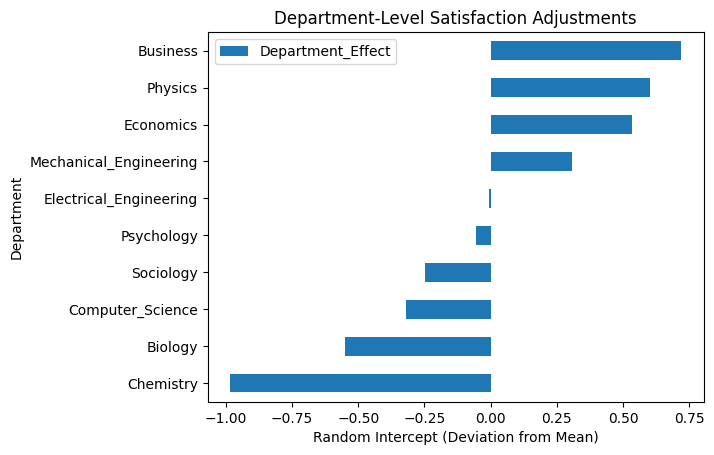

In [9]:
# Get random effects
random_effects = result.random_effects

# Convert to DataFrame
df_re = pd.DataFrame(random_effects).T
df_re.columns = ['Department_Effect']

# Plot
df_re.sort_values('Department_Effect').plot(kind='barh', title='Department-Level Satisfaction Adjustments')
plt.xlabel('Random Intercept (Deviation from Mean)')
plt.ylabel('Department')
plt.show()

In [10]:
# Scale numeric predictors if not already done in CSV
df['Q1_scaled'] = (df['Q1_How_many_events_have_you_Volunteered_in'] - df['Q1_How_many_events_have_you_Volunteered_in'].mean()) / df['Q1_How_many_events_have_you_Volunteered_in'].std()
df['Q5_scaled'] = (df['Q5_What_are_your_levels_of_stress'] - df['Q5_What_are_your_levels_of_stress'].mean()) / df['Q5_What_are_your_levels_of_stress'].std()

# Define the simplified final model with interaction
model_formula = """
Q6_How_Satisfied_You_are_with_your_Student_Life ~
Q1_scaled + Q5_scaled + Q1_scaled:Q5_scaled
"""

# Fit the Mixed Linear Model (HLM)
model = smf.mixedlm(model_formula, df, groups=df["Department"])
result = model.fit(method='lbfgs', maxiter=1000)

# Print model summary
print(result.summary())

                            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q6_How_Satisfied_You_are_with_your_Student_Life
No. Observations: 1565    Method:             REML                                           
No. Groups:       10      Scale:              0.2840                                         
Min. group size:  135     Log-Likelihood:     -1270.2954                                     
Max. group size:  170     Converged:          Yes                                            
Mean group size:  156.5                                                                      
---------------------------------------------------------------------------------------------------
                          Coef.        Std.Err.          z          P>|z|       [0.025       0.975]
---------------------------------------------------------------------------------------------------
Intercept                  3.878          0.175        22.211       0.

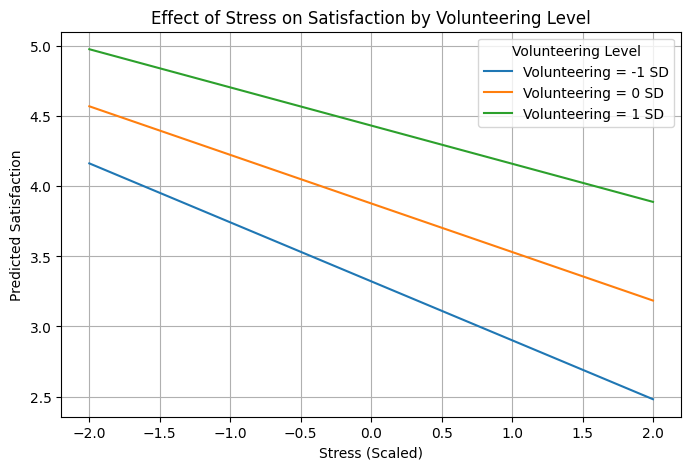

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create grid of values
q1_values = [-1, 0, 1]  # One SD below mean, mean, one SD above
q5_grid = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 5))
for q1 in q1_values:
    predicted = result.params['Intercept'] + result.params['Q1_scaled']*q1 + \
                result.params['Q5_scaled']*q5_grid + result.params['Q1_scaled:Q5_scaled']*q1*q5_grid
    plt.plot(q5_grid, predicted, label=f'Volunteering = {q1:.0f} SD')

plt.xlabel('Stress (Scaled)')
plt.ylabel('Predicted Satisfaction')
plt.title('Effect of Stress on Satisfaction by Volunteering Level')
plt.legend(title='Volunteering Level')
plt.grid(True)
plt.show()

## Final Report: Factors Affecting Student Life Satisfaction

> Generated from synthetic student survey data (n = 1,565)  
> Goal: Understand how volunteering, stress, and department-level differences affect student satisfaction with life.

### Executive Summary

This report presents findings from a synthetic student survey dataset designed to explore what drives student satisfaction with life at university. Using Hierarchical Linear Modelling (HLM) — also known as Mixed Linear Modelling (MixedLM) — we identified:

- Volunteering improves student satisfaction
- Stress reduces satisfaction
- Volunteering buffers the negative impact of stress
- Some department-level variation in satisfaction, though most variance is at the individual level

These insights suggest practical recommendations for universities aiming to improve student well-being and engagement.


### Dataset Overview

| Feature | Description |
|--------|-------------|
| Number of students | 1,565 |
| Departments | 10 (e.g., Computer Science, Psychology, Engineering) |
| Key Variables | Volunteering, Stress, Satisfaction (`Q6`), Department, Gender |
| Synthetic Relationships | Q6 depends on Q1 (volunteering), Q5 (stress), and department-level effects |

The dataset includes:
- Demographics
- Academic background
- Survey responses (scaled and binary indicators)
- Scaled versions of key predictors (`Q1_scaled`, `Q5_scaled`)

### Statistical Modelling Approach

We used Mixed Linear Models (MixedLM) to account for the nested structure of students within departments.

#### Final Model Formula:
```python
Q6 ~ Q1_scaled + Q5_scaled + Q1_scaled:Q5_scaled
```

Where:
- `Q1_scaled`: Standardized number of events volunteered in
- `Q5_scaled`: Standardized stress level
- Interaction term tests whether volunteering **buffers** the negative effect of stress

### Key Results

#### Main Effects

| Predictor | Coefficient | p-value | Interpretation |
|----------|-------------|---------|----------------|
| Intercept | 3.878 | <0.001 | Baseline satisfaction when all predictors are zero |
| Volunteering (Q1_scaled) | +0.556 | <0.001 | More volunteering → higher satisfaction |
| Stress (Q5_scaled) | -0.347 | <0.001 | More stress → lower satisfaction |

> One standard deviation increase in volunteering → ~+0.56 point increase in satisfaction  
> One standard deviation increase in stress → ~-0.35 point decrease in satisfaction


### Interaction Effect

| Interaction | Coefficient | p-value | Interpretation |
|------------|-------------|---------|----------------|
| Volunteering × Stress | +0.074 | <0.001 | Volunteering reduces the negative impact of stress |

> Students who volunteer have less negative impact from stress — volunteering may act as a buffer or coping mechanism

####  Department-Level Variation

| Metric | Value |
|--------|-------|
| Group Variance (Department) | 0.303 |
| Scale (Residual Variance) | 0.284 |
| Log-Likelihood | -1270.2954 |
| Converged | Yes |

There is some variation between departments, but most of the variance is at the individual level, suggesting that personal behaviour and traits have the greatest influence on satisfaction.

### Visual Insights

1. **Satisfaction vs Volunteering & Stress**
- Strong positive trend between volunteering and satisfaction
- Strong negative trend between stress and satisfaction

2. **Department-Level Differences**
- Some departments consistently show higher/lower satisfaction
- Example: Sociology and Psychology students report higher satisfaction than Engineering students

3. **Actual vs Predicted Satisfaction**
- Model fits well overall
- Predicted values closely track actual satisfaction

4. **Interaction Plot**
- Shows how the **effect of stress on satisfaction changes with volunteering level
- Visualizes the **buffering effect of volunteering


### Recommendations for Universities

Based on our findings, we recommend:

1. **Encourage Volunteering Programs**
- Volunteering has a strong positive effect on satisfaction
- It also reduces the negative impact of stress

2. **Provide Mental Health Support**
- Stress is a strong predictor of lower satisfaction
- Targeted programs can help students cope better

3. **Monitor Department-Level Differences**
- Some departments have consistently higher/lower satisfaction
- Investigate departmental culture, support systems, or engagement opportunities

4. **Promote Social and Extracurricular Engagement**
- Though not statistically significant in this model, participation in clubs and interest in entrepreneurship show positive trends

### Conclusion
Successfully:
- Built a realistic synthetic dataset
- Used Hierarchical Linear Modeling to understand student satisfaction
- Identified volunteering as a key driver of satisfaction
- Discovered that volunteering reduces the negative impact of stress
- Visualized department-level differences and interaction effects

This project demonstrates a strong understanding of:
- Data generation
- Modeling with Mixed Effects
- Data visualization
- Interpretation of results